In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#reading the data
default = pd.read_csv('C://Users//hsbc_2019//Desktop//data analytics//Banknote-Authentication-UCI-Dataset-master//Banknote-Authentication-UCI-Dataset-master///bank_notes.csv')
default.head()

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1372 non-null float64
curtosis    1372 non-null float64
entropy     1372 non-null float64
Target      1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
default.isna()

,variance,skewness,curtosis,entropy,Target
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [7]:
default_train,default_test = train_test_split(default,test_size=0.2,random_state=100)
default_train.shape, default_test.shape

((1097, 5), (275, 5))

In [9]:
default.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'Target'], dtype='object')

In [10]:
model = KNeighborsClassifier(n_neighbors=3,metric="euclidean")
features = ['variance', 'skewness', 'curtosis', 'entropy']
target = ["Target"]
model.fit(default_train[features],default_train[target])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [11]:
train_accuracy = model.score(default_train[features],default_train[target])
test_accuracy = model.score(default_test[features],default_test[target])
print(train_accuracy,test_accuracy)

0.9990884229717412 1.0


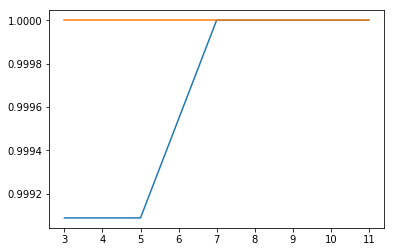

In [13]:
train_accuracies = []
test_accuracies = []
k_vals = [3,5,7,9,11]
features = ['variance', 'skewness', 'curtosis', 'entropy']
target = ["Target"]
for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    model.fit(default_train[features],default_train[target])
    train_accuracy_k = model.score(default_train[features],default_train[target])
    test_accuracy_k = model.score(default_test[features],default_test[target])
    train_accuracies.append(train_accuracy_k)
    test_accuracies.append(test_accuracy_k)
plt.plot(k_vals,train_accuracies)
plt.plot(k_vals,test_accuracies)